In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [4]:
tf.set_random_seed(777)
np.random.seed(777)

In [5]:
#ydata=xdata*w+b
w=tf.Variable(tf.random_normal([1]),name='weight')
b=tf.Variable(tf.random_normal([1]),name='bias')

In [6]:
x=tf.placeholder(tf.float32, shape=[None])
y=tf.placeholder(tf.float32, shape=[None])
#[None,3]

In [7]:
hf=x*w+b
cost=tf.reduce_mean(tf.square(hf-y))
#예측값-실제값 -> 제곱 -> 합 -> 평균

In [8]:
opt=tf.train.GradientDescentOptimizer(learning_rate=0.01)
train=opt.minimize(cost)

In [9]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [11]:
for step in range(2001):
    _,cv,bv,wv=sess.run([train,cost,b,w],feed_dict={x:[1,2,3],y:[2,3,4]})
    if step % 100==0:
        print(step, cv, bv, wv)


0 1.3302349 [-0.83235663] [2.168677]
100 0.34429216 [-0.5454619] [1.679854]
200 0.21275164 [-0.2148748] [1.5344255]
300 0.13146769 [0.04499756] [1.4201072]
400 0.081239015 [0.24928111] [1.3302424]
500 0.050200745 [0.4098666] [1.2596006]
600 0.031021029 [0.5361014] [1.2040699]
700 0.019169085 [0.63533366] [1.1604173]
800 0.011845314 [0.7133389] [1.1261027]
900 0.00731967 [0.7746586] [1.0991279]
1000 0.004523099 [0.82286125] [1.0779237]
1100 0.0027950013 [0.8607528] [1.0612555]
1200 0.0017271442 [0.8905388] [1.0481522]
1300 0.0010672751 [0.9139535] [1.0378519]
1400 0.0006595154 [0.9323596] [1.0297551]
1500 0.00040754033 [0.94682854] [1.0233903]
1600 0.00025183623 [0.9582021] [1.018387]
1700 0.00015561536 [0.96714354] [1.0144535]
1800 9.616031e-05 [0.9741718] [1.0113618]
1900 5.9420563e-05 [0.97969687] [1.0089314]
2000 3.6718488e-05 [0.98404] [1.0070208]


In [15]:
print(sess.run(hf,feed_dict={x:[10]}))
print(sess.run(hf,feed_dict={x:[10,10.5]}))
print(sess.run(hf,feed_dict={x:[10,10.5,20,100]}))

[11.054249]
[11.054249 11.557759]
[ 11.054249  11.557759  21.124456 101.68612 ]


In [16]:
#변수값 초기화

In [17]:
w=tf.Variable([100.],tf.float32)
b=tf.Variable([-10.],tf.float32)
x=tf.placeholder(tf.float32)
y=tf.placeholder(tf.float32)
#hf=100 * x - 10

In [18]:
hf=x*w+b
cost=tf.reduce_sum(tf.square(hf-y))

In [22]:
opt=tf.train.GradientDescentOptimizer(0.01)
train=opt.minimize(cost)

In [23]:
xtrain=[1,2,3,4,5]
ytrain=[0,-1,-2,-3,-4]

In [24]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [26]:
for i in range(1000):
    sess.run(train, {x:xtrain,y:ytrain})

In [27]:
wv,bv,costv=sess.run([w,b,cost], {x:xtrain, y:ytrain})
print("weight:%s bias:%s cost:%s" %(wv,bv,costv))

weight:[-0.9999995] bias:[0.99999833] cost:2.5579538e-12


In [28]:
###연습문제###

In [29]:
x=[1,3,5]
y=[10,28,40]

In [31]:
#b는 무시
w=tf.placeholder(tf.float32)
hf=x*w
loss=tf.reduce_mean(tf.square(hf-y))

In [32]:
#선형회귀모델 작성.
#시각화 -> weight값을 -3 부터 5까지 0.1씩 
#증가시켜 가면서 cost값의 변화를 출력
import matplotlib.pyplot as plt

In [33]:
wHistory=[]
cHistory=[]

In [37]:
for i in range(-30,50):
    currW=i*0.1
    lossv=sess.run(loss, feed_dict={w:currW})
    wHistory.append(currW)
    cHistory.append(lossv)

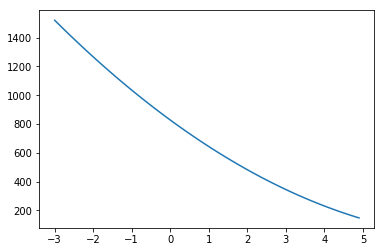

In [38]:
plt.plot(wHistory, cHistory)
plt.show()

In [39]:
###경사하강법에서 update 구문 작성
xdata=[1,2,3]
ydata=[1,2,3]

In [40]:
w=tf.Variable(tf.random_normal([1]))
x=tf.placeholder(tf.float32)
y=tf.placeholder(tf.float32)

In [41]:
hf=x*w

In [42]:
lr=0.1
cost=tf.reduce_mean(tf.square(hf-y))
gradient=tf.reduce_mean((w*x-y)*x)
descent=w-lr*gradient
update=w.assign(descent)

In [44]:
sess.run(tf.global_variables_initializer())
for step in range(21):
    sess.run(update,feed_dict={x:xdata,y:ydata})
    print(step, sess.run(cost,feed_dict={x:xdata,y:ydata}), sess.run(w))

0 1.2416564 [0.484181]
1 0.35318217 [0.72489655]
2 0.10046073 [0.85327816]
3 0.028575515 [0.92174834]
4 0.008128143 [0.9582658]
5 0.0023119969 [0.9777418]
6 0.00065763266 [0.98812896]
7 0.00018705941 [0.9936688]
8 5.3208234e-05 [0.99662334]
9 1.5134606e-05 [0.9981991]
10 4.3052346e-06 [0.99903953]
11 1.224619e-06 [0.99948776]
12 3.4819786e-07 [0.99972683]
13 9.903059e-08 [0.9998543]
14 2.8139278e-08 [0.99992234]
15 8.003294e-09 [0.9999586]
16 2.2793607e-09 [0.9999779]
17 6.4716704e-10 [0.9999882]
18 1.8779645e-10 [0.9999937]
19 5.199278e-11 [0.99999666]
20 1.44998085e-11 [0.9999982]


In [45]:
###multi variable linear regression

In [46]:
x1data=[73,93,90,95,72]#5명 모의고사 점수
x2data=[80,88,92,98,66]
x3data=[75,92,90,100,70]
ydata=[152,185,180,195,140]

In [48]:
x1=tf.placeholder(tf.float32)
x2=tf.placeholder(tf.float32)
x3=tf.placeholder(tf.float32)
y=tf.placeholder(tf.float32)

In [49]:
w1=tf.Variable(tf.random_normal([1]))
w2=tf.Variable(tf.random_normal([1]))
w3=tf.Variable(tf.random_normal([1]))
b=tf.Variable(tf.random_normal([1]))
hf=x1*w1+x2*w2+x3*w3+b

In [50]:
cost=tf.reduce_mean(tf.square(hf-y))

In [51]:
opt=tf.train.GradientDescentOptimizer(1e-5)
train=opt.minimize(cost)

In [52]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [54]:
for step in range(2001):
    cv,hfv,_=sess.run([cost, hf,train],
             feed_dict={x1:x1data,
                        x2:x2data,x3:x3data,
                        y:ydata})
    if step%10==0:
        print(step,"cost:",cv,
              "\nprediction:",hfv)
        #ydata=[152,185,180,195,140]

0 cost: 10.765813 
prediction: [146.3548  185.61145 178.45651 199.02449 141.73436]
10 cost: 10.742764 
prediction: [146.36229 185.60631 178.45929 199.02498 141.72864]
20 cost: 10.719778 
prediction: [146.36977 185.60118 178.46207 199.02545 141.72292]
30 cost: 10.696901 
prediction: [146.3772  185.59604 178.46483 199.0259  141.7172 ]
40 cost: 10.674115 
prediction: [146.38463 185.59093 178.4676  199.02635 141.7115 ]
50 cost: 10.651406 
prediction: [146.39207 185.58585 178.47037 199.02682 141.70584]
60 cost: 10.628823 
prediction: [146.39946 185.58076 178.47313 199.02727 141.70016]
70 cost: 10.60631 
prediction: [146.40683 185.57565 178.47586 199.0277  141.69449]
80 cost: 10.583937 
prediction: [146.41418 185.5706  178.4786  199.02814 141.68886]
90 cost: 10.561632 
prediction: [146.42155 185.56558 178.48135 199.0286  141.68326]
100 cost: 10.5394335 
prediction: [146.42886 185.56052 178.48407 199.029   141.67764]
110 cost: 10.517327 
prediction: [146.43617 185.5555  178.48679 199.02943 14

1240 cost: 8.525937 
prediction: [147.1616  185.0635  178.7648  199.05208 141.12718]
1250 cost: 8.512011 
prediction: [147.1672  185.05975 178.76701 199.05205 141.12305]
1260 cost: 8.498223 
prediction: [147.1728  185.05603 178.76924 199.05208 141.11896]
1270 cost: 8.484426 
prediction: [147.17839 185.0523  178.77144 199.05206 141.11485]
1280 cost: 8.470667 
prediction: [147.18396 185.04857 178.77362 199.05203 141.11075]
1290 cost: 8.456988 
prediction: [147.18951 185.04485 178.77582 199.05202 141.10666]
1300 cost: 8.443374 
prediction: [147.19505 185.04117 178.77803 199.052   141.1026 ]
1310 cost: 8.429786 
prediction: [147.2006  185.03749 178.78024 199.052   141.09856]
1320 cost: 8.416254 
prediction: [147.20612 185.03381 178.78241 199.05196 141.0945 ]
1330 cost: 8.402838 
prediction: [147.2116  185.0301  178.78458 199.05193 141.09045]
1340 cost: 8.389388 
prediction: [147.2171  185.02647 178.78677 199.0519  141.08644]
1350 cost: 8.375984 
prediction: [147.22263 185.02284 178.78899 1

In [55]:
####행렬곱셈 형태로 변환

In [59]:
xdata=[[73,93,90,95,72],#5명 모의고사 점수
       [80,88,92,98,66],
       [75,92,90,100,70]]
ydata=[[152],[185],[180],[195],[140]]

In [63]:
xdata=np.array(xdata).T
ydata

[[152], [185], [180], [195], [140]]

In [67]:
xdata.shape #5,3
np.shape(ydata) #5,1

(5, 1)

In [68]:
x=tf.placeholder(tf.float32,shape=[None,3])
y=tf.placeholder(tf.float32,shape=[None,1])
w=tf.Variable(tf.random_normal([3,1]))
b=tf.Variable(tf.random_normal([1]))

In [69]:
hf=tf.matmul(x,w) + b  #(5,3) *(3,1) + 1 

In [70]:
cost=tf.reduce_mean(tf.square(hf-y))

In [71]:
opt= tf.train.GradientDescentOptimizer(1e-5)
train=opt.minimize(cost)

In [73]:
#완성
sess=tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(2001):
    cv, hfv, _=sess.run([cost,hf,train],feed_dict={x:xdata,y:ydata})
    if step%10==0:
        print(cv, hfv)

15016.315 [[39.713856]
 [56.172237]
 [52.05156 ]
 [52.147823]
 [44.609955]]
8.452826 [[148.17694]
 [186.02344]
 [181.43417]
 [191.53462]
 [143.54051]]
8.283548 [[148.51674]
 [186.4144 ]
 [181.83199]
 [191.96437]
 [143.83574]]
8.254872 [[148.52571]
 [186.40923]
 [181.83513]
 [191.96892]
 [143.82918]]
8.226344 [[148.53368]
 [186.4029 ]
 [181.83707]
 [191.97217]
 [143.82173]]
8.197965 [[148.5416 ]
 [186.39656]
 [181.83897]
 [191.97539]
 [143.81429]]
8.1697235 [[148.5495 ]
 [186.39026]
 [181.84091]
 [191.97864]
 [143.80687]]
8.141594 [[148.55737]
 [186.38394]
 [181.84279]
 [191.98184]
 [143.79945]]
8.113603 [[148.56525]
 [186.37767]
 [181.84471]
 [191.98508]
 [143.79207]]
8.085759 [[148.57307]
 [186.37138]
 [181.84659]
 [191.98828]
 [143.7847 ]]
8.058016 [[148.58092]
 [186.36516]
 [181.84851]
 [191.99152]
 [143.77734]]
8.030477 [[148.58868]
 [186.35889]
 [181.85036]
 [191.99467]
 [143.77   ]]
8.003 [[148.59647]
 [186.35268]
 [181.85225]
 [191.9979 ]
 [143.76268]]
7.9756804 [[148.60422]
 [1

5.7974844 [[149.29189]
 [185.79323]
 [182.01645]
 [192.29338]
 [143.10362]]
5.780772 [[149.29784]
 [185.78844]
 [182.01784]
 [192.29602]
 [143.09796]]
5.7641287 [[149.30376]
 [185.78362]
 [182.0192 ]
 [192.29861]
 [143.09229]]
5.747533 [[149.30966]
 [185.77882]
 [182.02052]
 [192.30125]
 [143.08665]]
5.731069 [[149.31555]
 [185.77405]
 [182.02188]
 [192.30383]
 [143.08101]]
5.714647 [[149.32143]
 [185.7693 ]
 [182.02322]
 [192.30646]
 [143.0754 ]]
5.6983247 [[149.32729]
 [185.76456]
 [182.02458]
 [192.30905]
 [143.06978]]
5.6820397 [[149.33313]
 [185.75983]
 [182.02591]
 [192.31166]
 [143.06418]]
5.6658597 [[149.33897]
 [185.7551 ]
 [182.02725]
 [192.31425]
 [143.05861]]
5.649747 [[149.34479]
 [185.7504 ]
 [182.02858]
 [192.31685]
 [143.05304]]
5.633739 [[149.35057]
 [185.74568]
 [182.02989]
 [192.31941]
 [143.04749]]
5.6177726 [[149.35637]
 [185.74098]
 [182.03122]
 [192.32199]
 [143.04195]]
5.601913 [[149.36212]
 [185.73631]
 [182.03256]
 [192.32457]
 [143.0364 ]]
5.5861144 [[149.367

In [81]:
#90 90 90 => 예상되는 점수?

xy = np.loadtxt('data-01-test-score.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

print(x_data, "\nx_data shape:", x_data.shape)
print(y_data, "\ny_data shape:", y_data.shape)

[[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]
 [ 53.  46.  55.]
 [ 69.  74.  77.]
 [ 47.  56.  60.]
 [ 87.  79.  90.]
 [ 79.  70.  88.]
 [ 69.  70.  73.]
 [ 70.  65.  74.]
 [ 93.  95.  91.]
 [ 79.  80.  73.]
 [ 70.  73.  78.]
 [ 93.  89.  96.]
 [ 78.  75.  68.]
 [ 81.  90.  93.]
 [ 88.  92.  86.]
 [ 78.  83.  77.]
 [ 82.  86.  90.]
 [ 86.  82.  89.]
 [ 78.  83.  85.]
 [ 76.  83.  71.]
 [ 96.  93.  95.]] 
x_data shape: (25, 3)
[[152.]
 [185.]
 [180.]
 [196.]
 [142.]
 [101.]
 [149.]
 [115.]
 [175.]
 [164.]
 [141.]
 [141.]
 [184.]
 [152.]
 [148.]
 [192.]
 [147.]
 [183.]
 [177.]
 [159.]
 [177.]
 [175.]
 [175.]
 [149.]
 [192.]] 
y_data shape: (25, 1)


In [82]:
X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = tf.matmul(X, W) + b

cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train], 
                                   feed_dict={X: xdata, Y: y_data})
    if step % 10 == 0:
        print(step, "Cost:", cost_val, "\nPrediction:\n", hy_val)

InvalidArgumentError: Incompatible shapes: [5,1] vs. [25,1]
	 [[node sub_13 (defined at C:\Users\student\Anaconda3\lib\site-packages\tensorflow_core\python\framework\ops.py:1748) ]]

Original stack trace for 'sub_13':
  File "C:\Users\student\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\student\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\student\Anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\student\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 563, in start
    self.io_loop.start()
  File "C:\Users\student\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\student\Anaconda3\lib\asyncio\base_events.py", line 534, in run_forever
    self._run_once()
  File "C:\Users\student\Anaconda3\lib\asyncio\base_events.py", line 1771, in _run_once
    handle._run()
  File "C:\Users\student\Anaconda3\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\student\Anaconda3\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "C:\Users\student\Anaconda3\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "C:\Users\student\Anaconda3\lib\site-packages\tornado\gen.py", line 787, in inner
    self.run()
  File "C:\Users\student\Anaconda3\lib\site-packages\tornado\gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "C:\Users\student\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\Users\student\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\student\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 272, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\Users\student\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\student\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 542, in execute_request
    user_expressions, allow_stdin,
  File "C:\Users\student\Anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\student\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\student\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\student\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2855, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\student\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in _run_cell
    return runner(coro)
  File "C:\Users\student\Anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Users\student\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3058, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\student\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3249, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "C:\Users\student\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-82-ec8ad21dccf1>", line 12, in <module>
    cost = tf.reduce_mean(tf.square(hypothesis - Y))
  File "C:\Users\student\Anaconda3\lib\site-packages\tensorflow_core\python\ops\math_ops.py", line 899, in binary_op_wrapper
    return func(x, y, name=name)
  File "C:\Users\student\Anaconda3\lib\site-packages\tensorflow_core\python\ops\gen_math_ops.py", line 11086, in sub
    "Sub", x=x, y=y, name=name)
  File "C:\Users\student\Anaconda3\lib\site-packages\tensorflow_core\python\framework\op_def_library.py", line 794, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\student\Anaconda3\lib\site-packages\tensorflow_core\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "C:\Users\student\Anaconda3\lib\site-packages\tensorflow_core\python\framework\ops.py", line 3357, in create_op
    attrs, op_def, compute_device)
  File "C:\Users\student\Anaconda3\lib\site-packages\tensorflow_core\python\framework\ops.py", line 3426, in _create_op_internal
    op_def=op_def)
  File "C:\Users\student\Anaconda3\lib\site-packages\tensorflow_core\python\framework\ops.py", line 1748, in __init__
    self._traceback = tf_stack.extract_stack()


In [77]:
print("Your score will be ", sess.run(hypothesis, 
                                      feed_dict={X: [[100,100, 100]]}))

print("Other scores will be ", sess.run(hypothesis,
                                        feed_dict={X: [[90, 90, 90], [90, 100, 80]]}))


Your score will be  [[98.441124]]
Other scores will be  [[88.56441]
 [74.9189 ]]


In [83]:
#logistic regression(classification)

In [84]:
xdata=[[1,2],
       [2,3],
       [3,1],
       [4,3],
       [5,3],
       [6,2]]
ydata=[[0],
       [0],
       [0],
       [1],
       [1],
       [1]]

In [85]:
x=tf.placeholder(tf.float32, shape=[None,2])
y=tf.placeholder(tf.float32, shape=[None,1])

In [86]:
w=tf.Variable(tf.random_normal([2,1]))
b=tf.Variable(tf.random_normal([1]))

In [87]:
hf=tf.sigmoid(tf.matmul(x,w)+b)

In [88]:
cost= -tf.reduce_mean(y*tf.log(hf)+
                      (1-y)*tf.log(1-hf))

In [89]:
train=tf.train.GradientDescentOptimizer(0.01).minimize(cost)

In [96]:
# 0.5 기준(크면->1.0, 작으면->0.0)
predicted=tf.cast(hf>0.5,dtype=tf.float32)
accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted,y),dtype=tf.float32))

In [97]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(20001):
        _,cv=sess.run([train,cost], feed_dict={x:xdata,y:ydata})
        if step%200==0:
            print(step, cv)
    hv,pv,av=sess.run([hf, predicted,accuracy],feed_dict={x:xdata,y:ydata})
    print("예측값:",hv, "예측분류:",pv,"정확도:",av)

0 0.75613284
200 0.42928183
400 0.40021095
600 0.38052335
800 0.3652178
1000 0.3522459
1200 0.34068248
1400 0.33007517
1600 0.32018617
1800 0.3108813
2000 0.3020787
2200 0.2937241
2400 0.28577805
2600 0.2782101
2800 0.27099463
3000 0.26410964
3200 0.2575349
3400 0.25125244
3600 0.24524544
3800 0.23949815
4000 0.23399608
4200 0.22872545
4400 0.2236736
4600 0.2188283
4800 0.21417838
5000 0.20971328
5200 0.20542318
5400 0.20129865
5600 0.19733101
5800 0.19351219
6000 0.18983437
6200 0.18629052
6400 0.18287379
6600 0.17957783
6800 0.17639667
7000 0.17332472
7200 0.17035681
7400 0.16748779
7600 0.16471319
7800 0.16202848
8000 0.15942954
8200 0.15691246
8400 0.1544737
8600 0.15210967
8800 0.14981703
9000 0.14759283
9200 0.14543396
9400 0.14333782
9600 0.14130159
9800 0.13932298
10000 0.13739955
10200 0.13552903
10400 0.13370936
10600 0.13193847
10800 0.13021459
11000 0.12853572
11200 0.12690027
11400 0.12530653
11600 0.12375299
11800 0.12223815
12000 0.12076057
12200 0.11931894
12400 0.11791

In [ ]:
# 1. 위에 작성한 방식처럼 트레이닝/테스트 데이터 나누지말고 작성
# 2. 70(트레이닝):30(테스트)의 비율로 분리
#    70(트레이닝) -> 모델 생성 -> 30(테스트) => 정확도?